In [1]:
from tensorflow import keras

In [3]:
!gdown "https://drive.google.com/uc?export=download&id=1--Vv1h6YMGn9boYiCbTx0TQH9vc_awPP"
model=keras.models.load_model('pascal_unet.h5',compile=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1--Vv1h6YMGn9boYiCbTx0TQH9vc_awPP
To: /content/pascal_unet.h5
215MB [00:01, 169MB/s]


In [14]:
import numpy as np

VOC_CLASSES = np.array([
    "background",
    "aeroplane",
    "bicycle",
    "bird",
    "boat",
    "bottle",
    "bus",
    "car",
    "cat",
    "chair",
    "cow",
    "diningtable",
    "dog",
    "horse",
    "motorbike",
    "person",
    "potted plant",
    "sheep",
    "sofa",
    "train",
    "tv/monitor",
])
class_labels ={(i):name for i,name in enumerate(VOC_CLASSES)}
labels_class={(name):i for i,name in enumerate(VOC_CLASSES)}
labels_class

{'aeroplane': 1,
 'background': 0,
 'bicycle': 2,
 'bird': 3,
 'boat': 4,
 'bottle': 5,
 'bus': 6,
 'car': 7,
 'cat': 8,
 'chair': 9,
 'cow': 10,
 'diningtable': 11,
 'dog': 12,
 'horse': 13,
 'motorbike': 14,
 'person': 15,
 'potted plant': 16,
 'sheep': 17,
 'sofa': 18,
 'train': 19,
 'tv/monitor': 20}

In [102]:
# np.sum(np.array([(pred==class_num)*1 for class_num in [labels_class[selectedclass] for selectedclass in ['car','person']]  ]),axis=0)

In [108]:
import PIL
import matplotlib.pyplot as plt

def removebg(img,bg,obj_list=['car','bus']):
  img=PIL.Image.open(img)
  img=img.resize((512,512))
  img=img.convert("RGB")
  img=np.array(img)
  img=np.expand_dims(img,axis=0)
  img=img/255
  pred=model.predict(img)
  pred=(pred>0.5)*1
  pred=np.argmax(pred,axis=-1)
  # print(pred.shape)
  fig=plt.figure(figsize=(15,10))
  fig.add_subplot(1,5,1)
  plt.axis("off")
  plt.title('original')
  plt.imshow(img[0,...])

  fig.add_subplot(1,5,2)
  plt.axis("off")
  plt.title(str(','.join(VOC_CLASSES[np.unique(pred[0,:,:])]) ))
  plt.imshow(pred[0,:,:])
  ###############################keep
  keep=np.sum(np.array([(pred==class_num)*1 for class_num in [labels_class[selectedclass] for selectedclass in obj_list]  ]),axis=0)
  # keep=(((pred==labels_class['bus'])*1) + ((pred==labels_class['car'])*1) + ((pred==labels_class['motorbike'])*1) >0.5)*1
  pred=pred*keep
  ###############################keep end
  fig.add_subplot(1,5,3)
  plt.axis("off")
  plt.title(str(','.join(VOC_CLASSES[np.unique(pred[0,:,:])]) ))
  plt.imshow(pred[0,:,:])

  pred=(pred>0.5)*1
  img=np.concatenate([img[0,...],np.expand_dims(pred[0,:,:],axis=-1)],axis=-1)*255
  img=np.uint8(img)
  # print(img.shape)
  fig.add_subplot(1,5,4)
  plt.axis("off")
  plt.title('bg removed')
  plt.imshow(img)

  img=PIL.Image.fromarray(img,mode="RGBA")
  bg=PIL.Image.open(bg).convert("RGBA")
  bg=bg.resize((512,512))
  img=PIL.Image.alpha_composite(bg,img)
  fig.add_subplot(1,5,5)
  plt.axis("off")
  plt.title('bg replaced')
  plt.imshow(img)
  return img

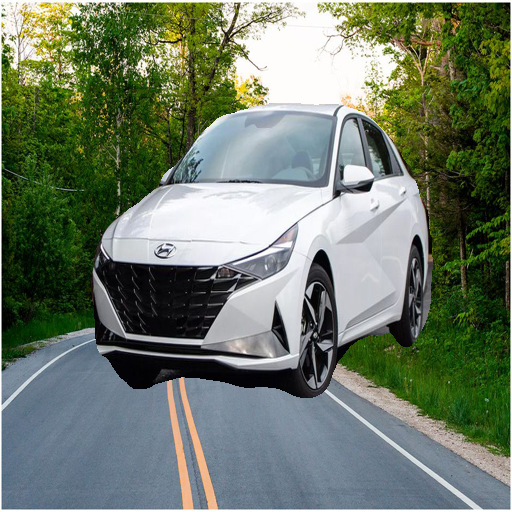

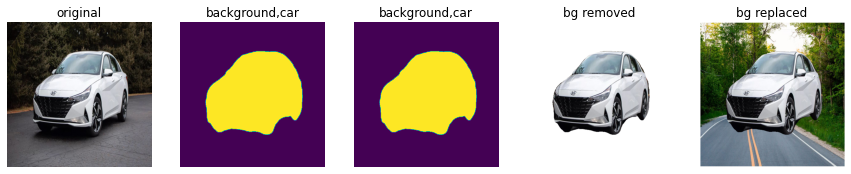

In [109]:
removebg('car.jpg','bg1.jpg')

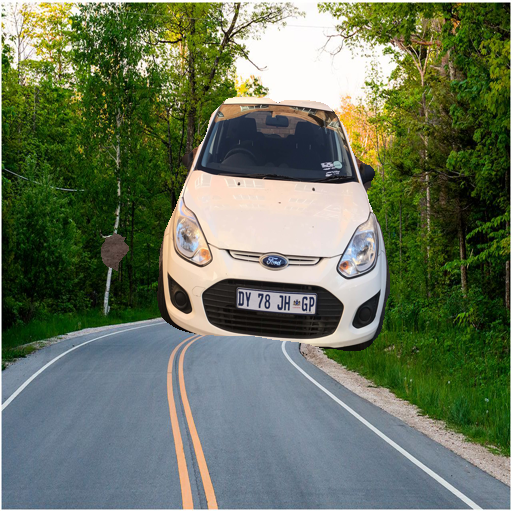

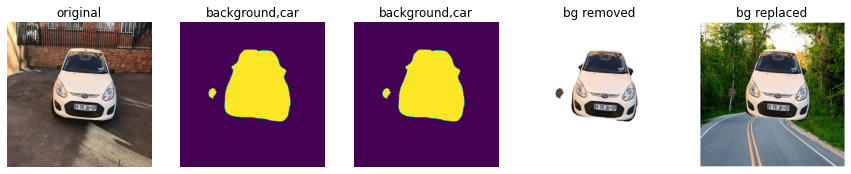

In [110]:
removebg('view1.jpeg','bg1.jpg')

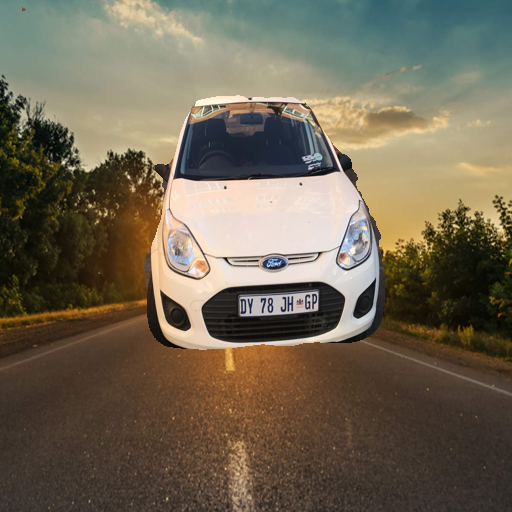

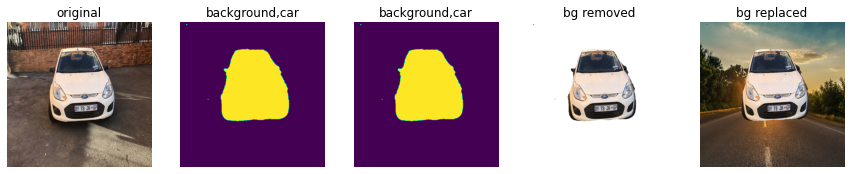

In [111]:
removebg('view2.jpeg','bg2.jpg')

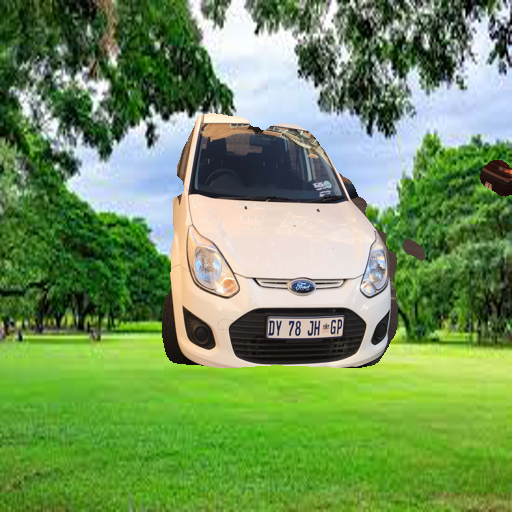

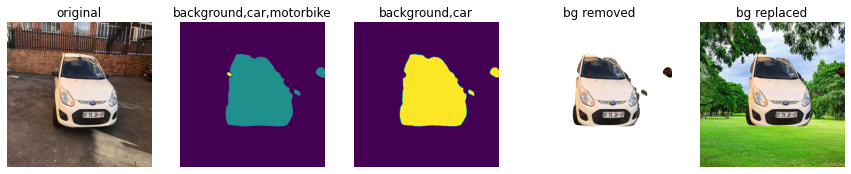

In [112]:
removebg('view3.jpeg','bg3.jpg')